# Bank Customer Churn Prediction

- kresnaandika36@gmail.com
- github.com/kresnandika

**This code is all my own with some references, feel free to use it**



---


# Introduction

A manager at a local bank is disturbed with more and more customers leaving their credit card services. They need a way of predicting which customers are most likely to stop using their credit card products (Customer Churn) in order to proactively check in on the customer to provide them better services in order to convince them to change their minds. You are given a dataset of 10,000 customers with 18 features per customer. Roughly 16% of the current customer base have churned so far, so it will be difficult to predict the ones who will.

As you analyze the data, before you create the model, the sales team also needs you to determine the most influential factors that can lead to a customer's decision of leaving the business. The head of the sales department is expecting a report that helps them visualize where the differences lie between churning and non-churning customers.

# Business Understanding

To define the success of the solution that we will deliver let's define the metrics as: F1 Score, Precision and Recall. This metrics were chosen since normally churn problems are imbalanced, but all depends on the definition of churn and the cost driven by each scenario.

## Objective


1. Identify which customers are most likely to be churned so the bank manager knows who to provide a better service to
  - The Top Priority is to identify churning customers,as if we predict non-churning customers as churned, it won't harm our business, but predicting churning customers as Non-churning will. False negatives won't hurt us, but False Positives do
  - This task is binary classification
2. A clean and easy to understand visual report that helps the sales team better visualize what makes a client churn or not churn
3. Precision and Recall Curves as well as the Confusion Matrix will also be used


## Goals

- consists of an exploratory analysis, where the objective is to know the behavior of the variables and to analyze attributes that indicate a strong relationship with the cancellation of credit card service customers.
- Performance of the model will be measured with accuracy and the rate of False Positives. The manager is looking for at least a 85% F1 Score accuracy
- identify customers who are getting churned. Even if we predict non-churning customers as churned, it won't harm our business. But predicting churning customers as Non-churning will do


## Problem Statements/issues


since only 16% of the customers are churned, a data upsampling method is needed to match them with the regular customer size to give our model a better chance of catching small details that would be missed had we not upsampled it

## Solution Statements



After we solve the issues, we will use some modeling in machine learning before we use deep neural net

- RandomForestClassifier : A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
- KNeighborsClassifier : is a type of classification where the function is only approximated locally and all computation is deferred until function evaluation. Since this algorithm relies on distance for classification, if the features represent different physical units or come in vastly different scales then normalizing the training data can improve its accuracy dramatically
- SVC : are supervised learning models with associated learning algorithms that analyze data for classification and regression analysis.
- xgb : is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework.

# Data Understanding



The Backend Engineer at the bank gives us the data through their MySQL database in an easy to use CSV with all missing features replaced by an "unkown" string. However, he tried to train a Naive Bayes classifier and accidently left in 2 prediction columns in the data. No Worries. We'll also remove the Clientnumber as this isn't important

Source Dataset : [Credit Card customers](https://www.kaggle.com/sakshigoyal7/credit-card-customers/code)

## Getting the Data

In [50]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

from google.colab import drive

drive.mount('/content/drive/')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [51]:
data = pd.read_csv('/content/drive/MyDrive/datasets/BankChurners.csv')
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [52]:
data = data.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',1)
data = data.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', 1)
data = data.drop('CLIENTNUM', 1)

In [53]:
round((data.isnull().sum() * 100)/(data.shape[0]),2)

Attrition_Flag              0.0
Customer_Age                0.0
Gender                      0.0
Dependent_count             0.0
Education_Level             0.0
Marital_Status              0.0
Income_Category             0.0
Card_Category               0.0
Months_on_book              0.0
Total_Relationship_Count    0.0
Months_Inactive_12_mon      0.0
Contacts_Count_12_mon       0.0
Credit_Limit                0.0
Total_Revolving_Bal         0.0
Avg_Open_To_Buy             0.0
Total_Amt_Chng_Q4_Q1        0.0
Total_Trans_Amt             0.0
Total_Trans_Ct              0.0
Total_Ct_Chng_Q4_Q1         0.0
Avg_Utilization_Ratio       0.0
dtype: float64

In [54]:
# Checking the Descriptive statistics of the numerical columns (Hidden Input)

data.describe().T.style.bar(
    subset=['mean'],
    color='lightsalmon').background_gradient(
    subset=['std'], cmap='plasma').background_gradient(subset=['75%'], cmap='plasma').background_gradient(
    subset=['max'], cmap='plasma')

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.000000,46.325960,8.016814,26.000000,41.000000,46.000000,52.000000,73.000000
Dependent_count,10127.000000,2.346203,1.298908,0.000000,1.000000,2.000000,3.000000,5.000000
Months_on_book,10127.000000,35.928409,7.986416,13.000000,31.000000,36.000000,40.000000,56.000000
Total_Relationship_Count,10127.000000,3.812580,1.554408,1.000000,3.000000,4.000000,5.000000,6.000000
Months_Inactive_12_mon,10127.000000,2.341167,1.010622,0.000000,2.000000,2.000000,3.000000,6.000000
Contacts_Count_12_mon,10127.000000,2.455317,1.106225,0.000000,2.000000,2.000000,3.000000,6.000000
Credit_Limit,10127.000000,8631.953698,9088.776650,1438.300000,2555.000000,4549.000000,11067.500000,34516.000000
Total_Revolving_Bal,10127.000000,1162.814061,814.987335,0.000000,359.000000,1276.000000,1784.000000,2517.000000
Avg_Open_To_Buy,10127.000000,7469.139637,9090.685324,3.000000,1324.500000,3474.000000,9859.000000,34516.000000
Total_Amt_Chng_Q4_Q1,10127.000000,0.759941,0.219207,0.000000,0.631000,0.736000,0.859000,3.397000


## Feature Description


- CLIENTNUM: Client number. Unique identifier for the customer holding the account

- Customer_Age: Demographic variable - Customer's Age in Years

- Gender: Demographic variable - M=Male, F=Female

- Dependent_count: Demographic variable - Number of dependents

- Education_Level: Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)

- Marital_Status: Demographic variable - Married, Single, Divorced, Unknown

- Income_Category: Demographic variable - Annual Income Category of the account holder (<  40K, 40K - 60K,  60K− 80K,  80K− 120K, > $120K, Unknown)

- Card_Category: Product Variable - Type of Card (Blue, Silver, Gold, Platinum)

- Months_on_book: Period of relationship with bank

- Total_Relationship_Count: Total no. of products held by the customer

- Months_Inactive_12_mon: No. of months inactive in the last 12 months

- Contacts_Count_12_mon: No. of Contacts in the last 12 months

- Credit_Limit: Credit Limit on the Credit Card

- Total_Revolving_Bal: Total Revolving Balance on the Credit Card

- Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)

- Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)

- Total_Trans_Amt: Total Transaction Amount (Last 12 months)

- Total_Trans_Ct: Total Transaction Count (Last 12 months)

- Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)

- Avg_Utilization_Ratio: Average Card Utilization Ratio

## Target

Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1(Attrited Customer) else 0(Existing Customer)

# Exploring the Data

The report for the sales team begins here

In [55]:
import seaborn as sns
import plotly.express as plx
import matplotlib.pyplot as plt

In [56]:
cat_features = data.select_dtypes(['object','category']).columns.to_list()

for cat in cat_features:
    fig = plx.pie(data[cat].value_counts(False), values=cat, names = data[cat].value_counts(False).index,title = cat,template='ggplot2')
    fig.show()

The customer gender is almost even, 30% college graduates with half being either Highschool graduates, unkown, or uneducated. The remaining 40% are either current college students,or grad students.

Almost half are married, 38% single, and the remaining 12 are divorced or unkown. 35% of customers make less than $40k per year which is near the poverty threshold. The rest are more evenly spaced out. 93% of customers choose the cheapest card option (likely the lowest interest rate) with a tiny portion choosing the more expensive cards

In [57]:
fig = plx.box(data, color="Attrition_Flag", y="Total_Relationship_Count",title='Number of products held by customer', points="all")
fig.show()

Churned customers are likely to hold less credit cards than existing customers which is shown by a lower median . Is there a deal you provide that favors customers with multiple credit cards? (Like customers with spouses, families, or buisnesses that need additional cards).

In [58]:
fig = plx.box(data, color="Attrition_Flag", y="Months_Inactive_12_mon", points="all",title='Number of months with no transactions in the last year')
fig.show()

Churned customers tend to have slightly more inactive months, but the distribution is more concentrated from the 1-4 months inactive (though this may be from the small sample size)

In [59]:
fig = plx.histogram(data, x="Credit_Limit", color="Attrition_Flag",title='Credit limit on the credit card')
fig.show()

Churned customers have a lower credit limit, so perhaps increase the credit limit for these

In [60]:
fig = plx.box(data, color="Attrition_Flag", y="Total_Revolving_Bal", points="all",title='Total revolving balance on the credit card')
fig.show()

Churned customers have a much smaller revolving balance which, because they don't fully pay off their credit card balance, may signify that they have less disposable income than staying customers that know they can pay off their revolving balance

In [61]:
fig = plx.histogram(data, x="Total_Trans_Ct", color="Attrition_Flag",title='Number of transactions made in the last year')
fig.show()

Churned customers will have a lower amount of transactions, which makes sense as they're less involved with this company and will have a smaller transaction change over time as displayed bellow

In [62]:
fig = fig = plx.box(data, color="Attrition_Flag", y="Total_Ct_Chng_Q4_Q1", points="all",title='Change in transaction number over the last year (Q4 over Q1)')
fig.show()

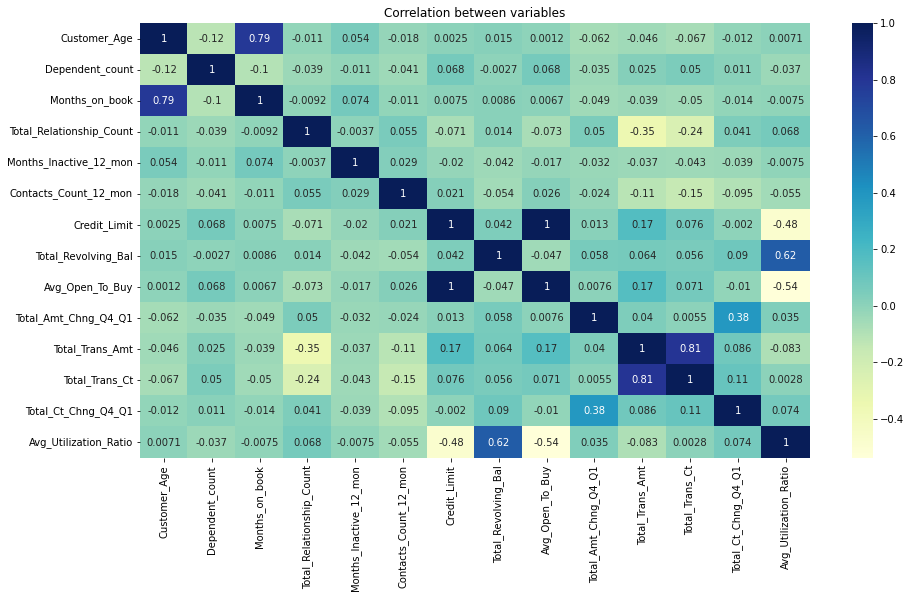

In [63]:
plt.subplots(figsize=(15,8))
plt.title('Correlation between variables')
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu')

**A lower Total Transaction change,revolving balance, and higher Number of contacts within the past year are most correlated with a churning customer**

The following features are the most correlated (> 0.75%)

- The months of being a customer with the bank(months on the book) and the Age are positive
- Credit Limit and Average Open To Buy Credit Line are also positive

The following are moderately correlated (30-75%)

- Total Transaction count and Total Relationship count are negative
- Credit Limit and Average Utilization Ratio are negative
Total Revolving balance and Average Utilization Ratio are positive
Average Open To Buy and Average Utilization Ration are negative

In [64]:
# Checking the imbalance in the target variable: Attrition_Flag (Hidden Input)

fig = plx.pie(data, values=data["Attrition_Flag"].value_counts(), color=data["Attrition_Flag"].unique() ,
             color_discrete_map={0:"#1f2833", 1:"#66fcf1"},
             title='Imbalance in Target Feature', names=data["Attrition_Flag"].unique())
fig.show()

# Data Preprocessing

In [65]:
data_copy = data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

## Converting Categorical Features

If you are familiar with machine learning, you will probably have encountered categorical features in many datasets. These generally include different categories or levels associated with the observation, which are non-numerical and thus need to be converted so the computer can process them.

In [66]:
data_cat = data[cat_features]
data_cat

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue
...,...,...,...,...,...,...
10122,Existing Customer,M,Graduate,Single,$40K - $60K,Blue
10123,Attrited Customer,M,Unknown,Divorced,$40K - $60K,Blue
10124,Attrited Customer,F,High School,Married,Less than $40K,Blue
10125,Attrited Customer,M,Graduate,Unknown,$40K - $60K,Blue


In [67]:
a_map = {'Attrited Customer':1, 'Existing Customer':0}
data['Attrition_Flag'] = data['Attrition_Flag'].map(a_map)

In [68]:
g_map = {'M':0, 'F':1}
data['Gender'] = data['Gender'].map(g_map)

In [69]:
from sklearn.preprocessing import OrdinalEncoder

marital = OrdinalEncoder(categories=[['Unknown','Single','Married','Divorced']])
data['Marital_Status'] = marital.fit_transform(data_cat[['Marital_Status']])

In [70]:
edu = OrdinalEncoder(categories=[['Unknown', 'Uneducated', 'High School', 'College','Graduate',
                                  'Post-Graduate','Doctorate']])
data['Education_Level'] = edu.fit_transform(data_cat[['Education_Level']])

In [71]:
income = OrdinalEncoder(categories=[['Unknown','Less than $40K','$40K - $60K','$60K - $80K',
                                     '$80K - $120K','$120K +']])
data['Income_Category'] = income.fit_transform(data_cat[['Income_Category']])

In [72]:
card = OrdinalEncoder(categories=[['Blue', 'Silver','Gold','Platinum']])
data['Card_Category'] = card.fit_transform(data_cat[['Card_Category']])

In [73]:
data[cat_features].head()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,0,0,2.0,2.0,3.0,0.0
1,0,1,4.0,1.0,1.0,0.0
2,0,0,4.0,2.0,4.0,0.0
3,0,1,2.0,0.0,1.0,0.0
4,0,0,1.0,2.0,3.0,0.0


## Scaling Continuous Features

Feature Scaling or Standardization: It is a step of Data Pre Processing that is applied to independent variables or features of data. It basically helps to normalize the data within a particular range. Sometimes, it also helps in speeding up the calculations in an algorithm.

**Why and Where to Apply Feature Scaling?**

The real-world dataset contains features that highly vary in magnitudes, units, and range. Normalization should be performed when the scale of a feature is irrelevant or misleading and not should Normalise when the scale is meaningful.

In [74]:
cont = data.select_dtypes(['float64','int64','category']).columns.to_list()
data_cont = data[cont]
data_cont.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,0,3,2.0,2.0,3.0,0.0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,1,5,4.0,1.0,1.0,0.0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,0,3,4.0,2.0,4.0,0.0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,1,4,2.0,0.0,1.0,0.0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,0,3,1.0,2.0,3.0,0.0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [75]:
from sklearn.preprocessing import StandardScaler

credit = StandardScaler()
data['Credit_Limit'] = credit.fit_transform(data_cont[['Credit_Limit']])

In [76]:
revolv_bal = StandardScaler()
data['Total_Revolving_Bal'] = revolv_bal.fit_transform(data_cont[['Total_Revolving_Bal']])

In [77]:
avg_open = StandardScaler()
data['Avg_Open_To_Buy'] = avg_open.fit_transform(data_cont[['Avg_Open_To_Buy']])

In [78]:
trans = StandardScaler()
data['Total_Trans_Amt'] = trans.fit_transform(data_cont[['Total_Trans_Amt']])

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

def preprocessCustomersPipeline(data):
    """Prepares the original customers data table in a form ready for the Deep Learning model, using
    all the transformations and edits we used above, and returns a ready dataset"""

    data = data.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',1)
    data = data.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', 1)
    data = data.drop('CLIENTNUM', 1)
    
    #Categorical Features
    a_map = {'Attrited Customer':1, 'Existing Customer':0}
    data['Attrition_Flag'] = data['Attrition_Flag'].map(a_map)
    g_map = {'M':0, 'F':1}
    data['Gender'] = data['Gender'].map(g_map)
    
    marital = OrdinalEncoder(categories=[['Unknown','Single','Married','Divorced']])
    data['Marital_Status'] = marital.fit_transform(data[['Marital_Status']])

    edu = OrdinalEncoder(categories=[['Unknown', 'Uneducated', 'High School', 'College','Graduate',
                                      'Post-Graduate','Doctorate']])
    data['Education_Level'] = edu.fit_transform(data[['Education_Level']])

    income = OrdinalEncoder(categories=[['Unknown','Less than $40K','$40K - $60K','$60K - $80K',
                                         '$80K - $120K','$120K +']])
    data['Income_Category'] = income.fit_transform(data[['Income_Category']])

    card = OrdinalEncoder(categories=[['Blue', 'Silver','Gold','Platinum']])
    data['Card_Category'] = card.fit_transform(data[['Card_Category']])
    
    #Numerical Features
    credit = StandardScaler()
    data['Credit_Limit'] = credit.fit_transform(data[['Credit_Limit']])
    revolv_bal = StandardScaler()
    data['Total_Revolving_Bal'] = revolv_bal.fit_transform(data[['Total_Revolving_Bal']])
    avg_open = StandardScaler()
    data['Avg_Open_To_Buy'] = avg_open.fit_transform(data[['Avg_Open_To_Buy']])
    trans = StandardScaler()
    data['Total_Trans_Amt'] = trans.fit_transform(data[['Total_Trans_Amt']])
    
    nums = ['Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Trans_Amt', 'Total_Trans_Ct']
    for n in nums:
        s = StandardScaler()
        data[n] = s.fit_transform(data[[n]])
    return data

## SMOTE | Over-Sampling

To correct the problem of unbalancing the classes of the data set, I will use the SMOTE method.


One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.

SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

>SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b.


>The combination of SMOTE and under-sampling performs better than plain under-sampling.

SMOTE: Synthetic Minority Over-sampling Technique](https://arxiv.org/abs/1106.1813), 2011

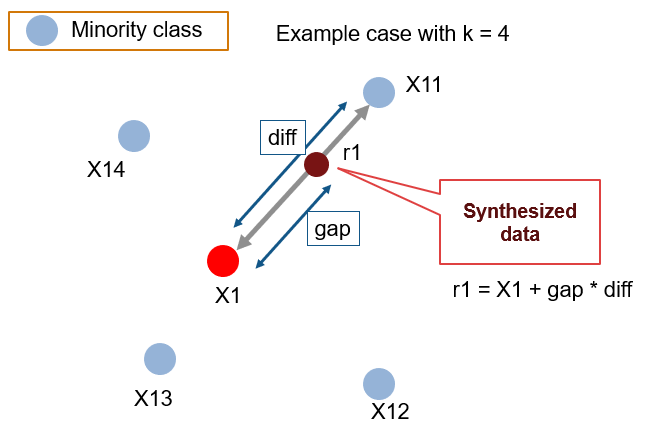

In [80]:
data.shape

(10127, 20)

In [81]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,0,3,2.0,2.0,3.0,0.0,39,5,1,3,0.446622,-0.473422,0.488971,1.335,-0.959707,42,1.625,0.061
1,0,49,1,5,4.0,1.0,1.0,0.0,44,6,1,2,-0.041367,-0.366667,-0.008486,1.541,-0.916433,33,3.714,0.105
2,0,51,0,3,4.0,2.0,4.0,0.0,36,4,1,0,-0.573698,-1.426858,-0.445658,2.594,-0.740982,20,2.333,0.000
3,0,40,1,4,2.0,0.0,1.0,0.0,34,3,4,1,-0.585251,1.661686,-0.734100,1.405,-0.951758,20,2.333,0.760
4,0,40,0,3,1.0,2.0,3.0,0.0,21,5,1,0,-0.430877,-1.426858,-0.302868,2.175,-1.056263,28,2.500,0.000


In [82]:
# Importing packages for SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
import plotly.graph_objects as go
import plotly.figure_factory as ff

from imblearn.pipeline import Pipeline

from collections import Counter

from plotly.subplots import make_subplots

In [83]:
# Generate x and y sets
x = data.drop('Attrition_Flag', axis=1).values
y = data['Attrition_Flag']

# Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, data['Attrition_Flag'], test_size = 0.33, random_state=1234)

In [84]:
sm = SMOTE(sampling_strategy='auto', random_state=69)
x_sm, y_sm = sm.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [85]:
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 5692, 1: 1093})
Counter({0: 2808, 1: 534})


In [86]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(
    go.Pie(labels=list(Counter(y_train).keys()), values=list(Counter(y_train).values()), name='Original data'),
    row=1, col=1
)

fig.add_trace(
    go.Pie(labels=list(Counter(y_sm).keys()), values=list(Counter(y_sm).values()), name='SMOTE data'),
    row=1, col=2
)

fig.update_traces(textposition='inside', hole=.4, hoverinfo="value+percent+name")
fig.update_layout(
    title_text="Class distribution",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Original', x=0.16, y=0.5, font_size=12, showarrow=False),
                 dict(text='SMOTE', x=0.82, y=0.5, font_size=12, showarrow=False)])
fig.show()

In [87]:
over = BorderlineSMOTE(sampling_strategy=0.3)
under = RandomUnderSampler(sampling_strategy=0.6)

steps = [('o', over), ('u', under)]

In [88]:
pipeline = Pipeline(steps=steps)

# transform the dataset
x_sm_us, y_sm_us = pipeline.fit_resample(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [89]:
list(Counter(y_train).keys())

[0, 1]

In [90]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(
    go.Pie(labels=list(Counter(y_train).keys()), values=list(Counter(y_train).values()), name='Original Data'),
    row=1, col=1
)

fig.add_trace(
    go.Pie(labels=list(Counter(y_sm_us).keys()), values=list(Counter(y_sm_us).values()), name='SMOTE and US data'),
    row=1, col=2
)

fig.update_traces(textposition='inside', hole=.4, hoverinfo="percent+name+value")
fig.update_layout(
    title_text="Class distribution",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Original', x=0.16, y=0.5, font_size=12, showarrow=False),
                 dict(text='SMOTE and UnderSample', x=0.9, y=0.5, font_size=12, showarrow=False)])
fig.show()

Model Testing no SMOTE

In [91]:
# XGBoost model
import xgboost as xgb
from sklearn.metrics import classification_report, f1_score, confusion_matrix, accuracy_score, roc_auc_score, roc_curve,plot_confusion_matrix

xgb_model = xgb.XGBClassifier(random_state=69, use_label_encoder=False, n_jobs=-1)

xgb_model.fit(X_train, y_train)

# XGBoost Score on the test data

xgb_model.score(X_test, y_test)

print('F1-Score: ', f1_score(y_test, xgb_model.predict(X_test)))

F1-Score:  0.8756218905472637


Model Testing with SMOTE

In [92]:
xgb_model = xgb.XGBClassifier(random_state=69, use_label_encoder=False, n_jobs=-1)

xgb_model.fit(x_sm, y_sm)

# XGBoost Score on the test data

xgb_model.score(X_test, y_test)

print('F1-Score: ', f1_score(y_test, xgb_model.predict(X_test)))

F1-Score:  0.8829493087557605


Model Testing with BorderlineSmote

In [93]:
xgb_model = xgb.XGBClassifier(random_state=69, use_label_encoder=False, n_jobs=-1)

xgb_model.fit(x_sm_us, y_sm_us)

# XGBoost Score on the test data

xgb_model.score(X_test, y_test)

print('F1-Score: ', f1_score(y_test, xgb_model.predict(X_test)))

F1-Score:  0.868231046931408


As you can see, the highest F1 score is when we're running a model with SMOTE. so in we will running a model with SMOTE

## ML Model Shortlisting
Testing out a couple Machine Learning models before we use the Deep Neural Net

For identifying the Customer churn, we are going to use Extreme Gradient Boosting technique (XGBoost)

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. The same code runs on major distributed environment (Hadoop, SGE, MPI) and can solve problems beyond billions of examples.

Read more about the same: https://xgboost.readthedocs.io/en/latest/

In [94]:

xgb_model = xgb.XGBClassifier(random_state=69, use_label_encoder=False, n_jobs=-1)

xgb_model.fit(x_sm, y_sm)

# XGBoost Score on the test data

xgb_model.score(X_test, y_test)

print(classification_report(y_test, xgb_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2808
           1       0.87      0.90      0.88       534

    accuracy                           0.96      3342
   macro avg       0.92      0.94      0.93      3342
weighted avg       0.96      0.96      0.96      3342



In [95]:
# pred = xgb_model.predict(X_test)
# pred = np.argmax(pred,axis = 1) 

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
knn = KNeighborsClassifier(n_neighbors=5)
svc = SVC()
xgb = xgboost.XGBClassifier(use_label_encoder=False)

ml_models = [rf,knn,svc, xgb]
for ml in ml_models:
    ml.fit(x_sm, y_sm)
    y_pred = ml.predict(X_test)
    print(accuracy_score(y_pred,y_test))
    print('F1-Score: ', f1_score (y_test, y_pred))

0.9551166965888689
F1-Score:  0.8592870544090055
0.8093955715140634
F1-Score:  0.5733422638981915
0.7929383602633154
F1-Score:  0.5785627283800243
0.961998803111909
F1-Score:  0.8829493087557605


as you can see, the best f1 score result is from xgboost

In [97]:
#after running
dt=xgboost.XGBClassifier(criterion='entropy',max_depth=11)
dt.fit(X_train, y_train)

dt_pred=dt.predict(X_test)

print('Report: ',classification_report(y_test, dt_pred))

Report:                precision    recall  f1-score   support

           0       0.98      0.99      0.98      2808
           1       0.93      0.87      0.90       534

    accuracy                           0.97      3342
   macro avg       0.95      0.93      0.94      3342
weighted avg       0.97      0.97      0.97      3342



In [98]:
#after running
dt=xgboost.XGBClassifier(criterion='entropy',max_depth=11)
dt.fit(x_sm, y_sm)

dt_pred=dt.predict(X_test)

print('Report: ',classification_report(y_test, dt_pred))

Report:                precision    recall  f1-score   support

           0       0.98      0.98      0.98      2808
           1       0.89      0.90      0.89       534

    accuracy                           0.97      3342
   macro avg       0.93      0.94      0.94      3342
weighted avg       0.97      0.97      0.97      3342



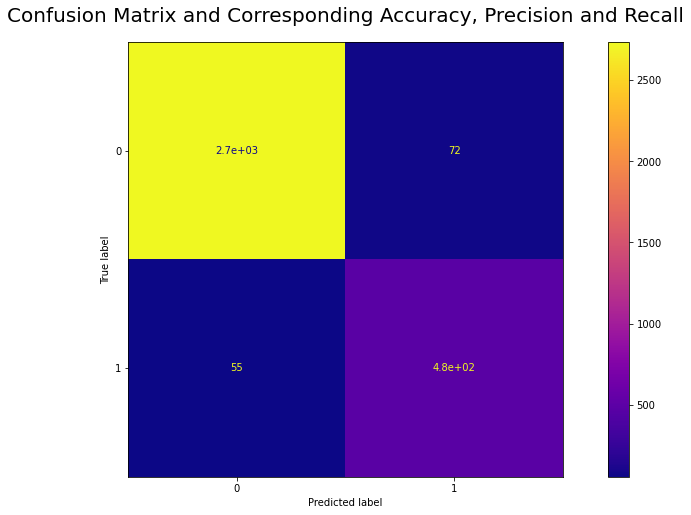

******************************
Accuracy : 0.9652902453620587
Precision : 0.9803711634546752
Recall : 0.9782763532763533
******************************


In [99]:
# Creating the Confusion Matrix (Hidden Input)

cfm = confusion_matrix(y_test, dt_pred)

TP = cfm[0][0]
FN = cfm[0][1]
FP = cfm[1][0]
TN = cfm[1][1]


fig, ax = plt.subplots(figsize=(16, 8))
plt.title("Confusion Matrix and Corresponding Accuracy, Precision and Recall", size=20, pad=20)
plot_confusion_matrix(xgb_model, X_test, y_test, cmap='plasma', ax=ax)
plt.show()

print("*" * 30)
print("Accuracy :", (TP+TN)/(TP+TN+FP+FN))
print("Precision :", (TP)/(TP+FP))
print("Recall :", (TP)/(TP+FN))
print("*" * 30)

## The Neural Network

Since this is a standard binary classification problem, we'll use a shallow feedforward neural network with 19 input neurons and 2 output neurons

A neural network is built using various hidden layers. Now that we know the computations that occur in a particular layer, let us understand how the whole neural network computes the output for a given input X. These can also be called the forward-propagation equations.


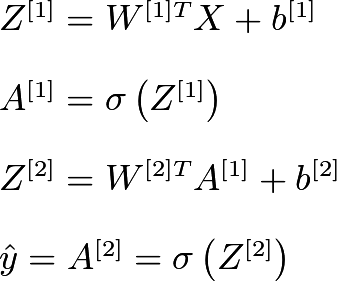

1. The first equation calculates the intermediate output Z[1] of the first hidden layer.
2. The second equation calculates the final output A[1] of the first hidden layer.
3. The third equation calculates the intermediate output Z[2] of the output layer.
4. The fourth equation calculates the final output A[2] of the output layer which is also the final output of the whole neural network.

In [100]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Dense(19,input_shape=X_train.shape[1:]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(7, activation="elu", kernel_initializer="LecunNormal"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(2, activation="relu",  kernel_initializer="he_normal")
])

In [101]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=keras.optimizers.Nadam(learning_rate=0.001),metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
213/213 [==============================] - 3s 4ms/step - loss: 2.0847 - accuracy: 0.7662 - val_loss: 0.7783 - val_accuracy: 0.8402
Epoch 2/50
213/213 [==============================] - 1s 3ms/step - loss: 1.2776 - accuracy: 0.8059 - val_loss: 0.6772 - val_accuracy: 0.8333
Epoch 3/50
213/213 [==============================] - 1s 3ms/step - loss: 1.2612 - accuracy: 0.8057 - val_loss: 0.6433 - val_accuracy: 0.8366
Epoch 4/50
213/213 [==============================] - 1s 3ms/step - loss: 1.0233 - accuracy: 0.8149 - val_loss: 0.6027 - val_accuracy: 0.8396
Epoch 5/50
213/213 [==============================] - 1s 3ms/step - loss: 0.8997 - accuracy: 0.8221 - val_loss: 0.5965 - val_accuracy: 0.8417
Epoch 6/50
213/213 [==============================] - 1s 3ms/step - loss: 0.8550 - accuracy: 0.8245 - val_loss: 0.5849 - val_accuracy: 0.8414
Epoch 7/50
213/213 [==============================] - 1s 2ms/step - loss: 0.8714 - accuracy: 0.8258 - val_loss: 0.5997 - val_accuracy: 0.8375
Epoch 

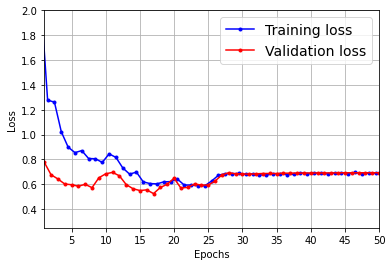

In [102]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.axis([1, 50, 0.25, 2])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [103]:
from sklearn.base import BaseEstimator, ClassifierMixin

#Translate the Tensorflow model into a Scikit-Learn model, so it can be used with the ensemble voting classifier
class NN(BaseEstimator, ClassifierMixin):
    def __init__(self, demo_param='demo'):
         self.demo_param = demo_param

    def fit(self, X, y):
        return self

    def predict(self, X):
        return model.predict(X)
    
    def predict_proba (self, X):
        return model.predict(X)

## Model Assemble
Ensembling our ML models together to get the highest possible accuracy. It's interesting how the Random Forest and XGBoost Classifiers got a 10% higher accuracy than the shallow neural network, for we did not need to tweak any of its hyperparameters. Perhaps Ockham's Razor is clearly shown here?

**Occam’s razor suggests that in machine learning, we should prefer simpler models with fewer coefficients over complex models like ensembles.

In [104]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, f1_score, confusion_matrix, accuracy_score

rf = RandomForestClassifier()
knn = KNeighborsClassifier(n_neighbors=5)
svc = SVC(probability=True)
xgb = xgboost.XGBClassifier(use_label_encoder=False)
nn = NN()

voting_clf = VotingClassifier(estimators=[('rf',rf), ('knn', knn), ('svc',svc),('xgb',xgb), ('nn', nn)], voting="soft", weights=[1,0.2,0.2,1,0.6])
voting_clf.fit(X_train, y_train)
pred = voting_clf.predict(X_test)
print('Accucracy :', accuracy_score(pred, y_test))

print(classification_report(y_test, pred))

Accucracy : 0.959904248952723
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2808
           1       0.93      0.81      0.87       534

    accuracy                           0.96      3342
   macro avg       0.95      0.90      0.92      3342
weighted avg       0.96      0.96      0.96      3342



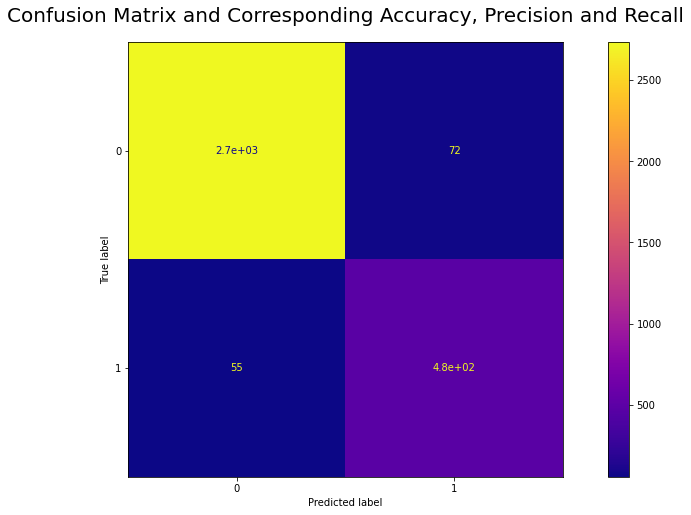

******************************
Accuracy : 0.959904248952723
Precision : 0.9645587213342599
Recall : 0.9886039886039886
******************************


In [105]:
# Creating the Confusion Matrix (Hidden Input)

cfm = confusion_matrix(y_test, pred)

TP = cfm[0][0]
FN = cfm[0][1]
FP = cfm[1][0]
TN = cfm[1][1]


fig, ax = plt.subplots(figsize=(16, 8))
plt.title("Confusion Matrix and Corresponding Accuracy, Precision and Recall", size=20, pad=20)
plot_confusion_matrix(xgb_model, X_test, y_test, cmap='plasma', ax=ax)
plt.show()

print("*" * 30)
print("Accuracy :", (TP+TN)/(TP+TN+FP+FN))
print("Precision :", (TP)/(TP+FP))
print("Recall :", (TP)/(TP+FN))
print("*" * 30)

## Metrics Evaluation 

- Confusion Matrix is a tool to determine the performance of classifier. It contains information about actual and predicted classifications. The below table shows confusion matrix of two-class, churned customers and non-churned customers classifier.

- True Positive (TP) is the number of correct predictions that an example is positive which means positive class correctly identified as positive. Example: Given class is churned and the classifier has been correctly predicted it as churned.

- False Negative (FN) is the number of incorrect predictions that an example is negative which means positive class incorrectly identified as negative. Example: Given class is churned however, the classifier has been incorrectly predicted it as non-churned.

- False positive (FP) is the number of incorrect predictions that an example is positive which means negative class incorrectly identified as positive. Example: Given class is non-churned however, the classifier has been incorrectly predicted it as churned.

- True Negative (TN) is the number of correct predictions that an example is negative which means negative class correctly identified as negative. Example: Given class is not churned and the classifier has been correctly predicted it as not negative.

- Recall

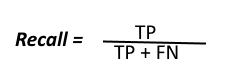

The above equation can be explained by saying, from all the positive classes, how many we predicted correctly.
Recall should be high as possible.
Precision

- Precision 

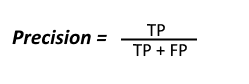

The above equation can be explained by saying, from all the classes we have predicted as positive, how many are actually positive.
Precision should be high as possible.

- Accuracy is From all the classes (positive and negative), how many of them we have predicted correctly. In this case, it will be 4/7.
Accuracy should be high as possible.

- F1-score

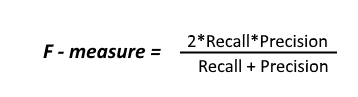

It is difficult to compare two models with low precision and high recall or vice versa. So to make them comparable, we use F-Score. F-score helps to measure Recall and Precision at the same time. It uses Harmonic Mean in place of Arithmetic Mean by punishing the extreme values more.

# Conclusion:

- The highest accuracy achieved was 96% and the highest f1-score is 90% which went way above our manager's expectations. However, we have raised the bar, and in further problems, he will be expecting more
- Total Transaction change,revolving balance,and Number of contacts within the past year are most correlated with a churning customer